In [12]:
import pandas as pd
import numpy as np

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

In [14]:
data = pd.read_excel(r'C:/Users/Lenovo-PC/Desktop/股票型基金经理.xlsx')

In [15]:
data

,经验值,绩效点,风控能力,稳定性,跳槽频率,人气指数,类型,从业年数,年均回报率,经理名字,1年内夏普比率,2年内夏普比率
0,6.83分,9.40分,9.67分,5.11分,2.76年/次,150865,货币型,5年191天,0.0333,刘朝阳,NaN,NaN
1,7.42分,10.00分,9.44分,7.12分,2.98年/次,70423,股票型,5年351天,0.2533,丘栋荣,1.74,0.93
2,9.32分,8.82分,1.96分,0.90分,4.93年/次,60150,混合型,9年315天,0.1650,彭敢,1.15,0.84
3,9.60分,6.36分,3.07分,3.78分,11.01年/次,60759,混合型,11年5天,0.3285,谢治宇,3.79,--
4,9.97分,8.16分,0.95分,5.02分,15.44年/次,57721,混合型,15年161天,0.2203,朱少醒,2.46,1.56
5,8.89分,7.02分,1.69分,9.04分,8.58年/次,56904,混合型,8年210天,0.2401,张坤,3.18,1.99
6,9.94分,9.67分,2.77分,7.26分,14.15年/次,55517,混合型,14年56天,0.1610,董承非,1.95,1.42
7,8.98分,7.24分,1.01分,1.26分,4.37年/次,46890,混合型,8年273天,0.1238,魏伟,1.91,0.89
8,9.91分,10.00分,3.99分,7.86分,7.17年/次,44396,混合型,14年125天,0.1806,曹名长,2.23,0.74
9,8.54分,10.00分,6.67分,7.61分,2.34年/次,41549,股票型,7年10天,0.1973,刘格菘,1.04,1.78


In [5]:
data_1 = data.loc[data['类型']=='股票型'].dropna(axis=0)

In [6]:
data_1.head()

TypeError: cannot do positional indexing on Int64Index with these indexers [<built-in function all>] of type builtin_function_or_method

In [32]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   经验值     80 non-null     float64
 1   绩效点     80 non-null     float64
 2   风控能力    80 non-null     float64
 3   稳定性     80 non-null     float64
 4   跳槽频率    80 non-null     float64
 5   人气指数    80 non-null     int64  
 6   类型      80 non-null     object 
 7   从业年     80 non-null     int64  
 8   从业天     80 non-null     int64  
 9   年均回报率   80 non-null     float64
 10  回报率     80 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 7.5+ KB


In [151]:
data['年均回报率'].astype('str')

0     0.1859
1     0.1244
2     0.1528
3     0.3411
4     0.3028
       ...  
70    0.4396
71    0.1278
72    0.0464
73    0.1923
74      0.13
Name: 年均回报率, Length: 75, dtype: object

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

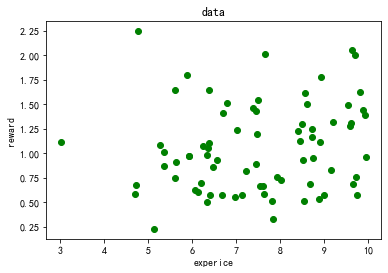

In [153]:
plt.scatter(data['经验值'],data['回报率'],color='green')
plt.ylabel('reward')
plt.xlabel('experice')
plt.title('data')
plt.show()

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data['经验值'],data['回报率'],train_size=0.8)
X_train.head()
X_train.shape

(60,)

In [155]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [156]:
a = model.intercept_
b = model.coef_
a = float(a)
b = float(b)
print('该模型的简单线性回归方程为y = {} + {} * x'.format(a, b))

该模型的简单线性回归方程为y = 0.32056723712960455 + 0.09378195384852869 * x


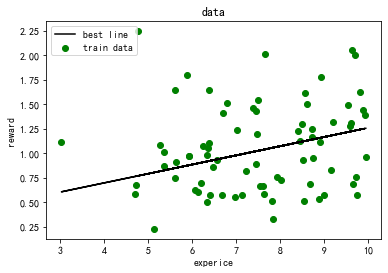

In [157]:
plt.scatter(data['经验值'],data['回报率'],color='green',label='train data')
plt.ylabel('reward')
plt.xlabel('experice')
plt.title('data')
#绘制最佳拟合曲线
Y_train_pred = model.predict(X_train)
plt.plot(X_train, Y_train_pred, color = 'black', label = 'best line')

#来个图例
plt.legend(loc = 2)

plt.show()

In [158]:
model.score(X_test,Y_test)

-0.3781572467082668

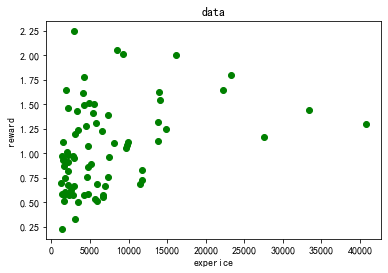

In [159]:
plt.scatter(data['人气指数'],data['回报率'],color='green')
plt.ylabel('reward')
plt.xlabel('experice')
plt.title('data')
plt.show()

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data['人气指数'],data['回报率'],train_size=0.8)
X_train.head()
X_train.shape

(60,)

In [161]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [162]:
a = model.intercept_
b = model.coef_
a = float(a)
b = float(b)
print('该模型的简单线性回归方程为y = {} + {} * x'.format(a, b))

该模型的简单线性回归方程为y = 0.8836695714033745 + 2.2922222918639262e-05 * x


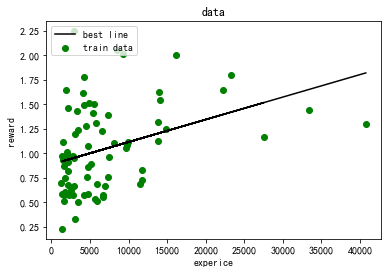

In [163]:
plt.scatter(data['人气指数'],data['回报率'],color='green',label='train data')
plt.ylabel('reward')
plt.xlabel('experice')
plt.title('data')
#绘制最佳拟合曲线
Y_train_pred = model.predict(X_train)
plt.plot(X_train, Y_train_pred, color = 'black', label = 'best line')

#来个图例
plt.legend(loc = 2)

plt.show()

In [164]:
model.score(X_test,Y_test)

0.1219037341463598

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

In [23]:
data = pd.read_excel(r'C:/Users/Lenovo-PC/Desktop/好买网基金经理完整_3.xlsx')

In [24]:
data

,基金规模,基金成立时间,风控能力,稳定性,跳槽频率,基金数,人气指数,从业时间,2年内夏普比率,近三月回报率,基金总收益,年均回报率,1年内夏普比率,类型,经理名字,从业,数,成立时间,当前时间,成立时间.1,经验值
0,21.97,2.097222,9.44,7.12,2.98,4,70542,5.983333,0.91,0.0353,1.506005,0.2517,1.71,股票型,丘栋荣,5,354,2019-04-03,2021-04-27,755,7.42
1,55.44,4.066667,6.67,7.61,2.35,10,41661,7.036111,1.84,-0.1444,1.412851,0.2008,1.13,股票型,刘格菘,7,13,2017-04-24,2021-04-27,1464,8.54
2,23.93,6.197222,6.76,6.53,7.67,5,27815,7.680556,2.43,-0.0282,1.194326,0.1555,4.10,股票型,鄢耀,7,245,2015-03-19,2021-04-27,2231,8.73
3,148.03,5.402778,9.42,9.93,5.33,1,25129,5.330556,1.95,-0.0437,1.947252,0.3653,3.12,股票型,袁芳,5,119,2015-12-30,2021-04-27,1945,6.17
4,172.49,5.561111,8.26,8.61,5.48,4,23356,5.488889,1.52,-0.0976,1.691127,0.3081,2.25,股票型,周应波,5,176,2015-11-03,2021-04-27,2002,6.60
5,3.88,5.925000,8.94,4.51,10.68,7,16579,10.686111,2.07,-0.0521,2.015401,0.1886,3.53,股票型,王筱苓,10,247,2015-06-25,2021-04-27,2133,9.69
6,10.17,6.177778,7.78,5.28,7.67,2,15024,7.680556,2.15,-0.0282,1.305694,0.1700,3.70,股票型,王君正,7,245,2015-03-26,2021-04-27,2224,8.73
7,72.17,5.305556,0.58,9.03,6.03,2,14736,6.033333,2.65,-0.0067,1.702003,0.2821,2.12,股票型,赵蓓,6,12,2016-02-03,2021-04-27,1910,7.49
8,24.60,6.477778,9.13,5.43,11.22,3,14550,11.227778,1.35,-0.1446,1.752656,0.1561,2.12,股票型,王栩,11,82,2014-12-08,2021-04-27,2332,9.81
9,5.42,3.261111,7.58,7.24,9.46,13,14010,9.463889,1.76,-0.0586,1.361854,0.1439,1.74,股票型,王景,9,167,2018-02-08,2021-04-27,1174,9.20


In [26]:
pd.export_data_to_csv() 

AttributeError: module 'pandas' has no attribute 'export_data_to_csv'

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data['风控能力'],data['2年内夏普比率'],train_size=0.8)
X_train.head()
X_train.shape

(68,)

In [11]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

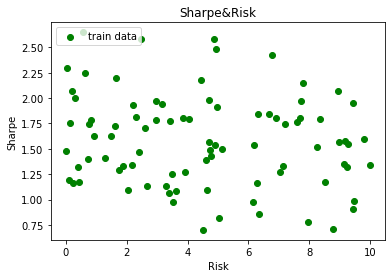

In [19]:
plt.scatter(data['风控能力'],data['2年内夏普比率'],color='green',label='train data')
plt.ylabel('Sharpe')
plt.xlabel('Risk')
plt.title('Sharpe&Risk')
#绘制最佳拟合曲线
#Y_train_pred = model.predict(X_train)
#plt.plot(X_train, Y_train_pred, color = 'black', label = 'best line')

#来个图例
plt.legend(loc = 2)

plt.show()

In [13]:
a = model.intercept_
b = model.coef_
a = float(a)
b = float(b)
print('该模型的简单线性回归方程为y = {} + {} * x'.format(a, b))

该模型的简单线性回归方程为y = 1.5829060527320495 + -0.005839153128306856 * x


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(data['跳槽频率'],data['2年内夏普比率'],train_size=0.8)
X_train.head()
X_train.shape

(68,)

In [15]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

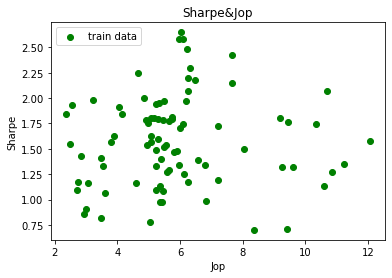

In [18]:
plt.scatter(data['跳槽频率'],data['2年内夏普比率'],color='green',label='train data')
plt.ylabel('Sharpe')
plt.xlabel('Jop')
plt.title('Sharpe&Jop')
#绘制最佳拟合曲线
#Y_train_pred = model.predict(X_train)
#plt.plot(X_train, Y_train_pred, color = 'black', label = 'best line')

#来个图例
plt.legend(loc = 2)

plt.show()

In [17]:
a = model.intercept_
b = model.coef_
a = float(a)
b = float(b)
print('该模型的简单线性回归方程为y = {} + {} * x'.format(a, b))

该模型的简单线性回归方程为y = 1.5426915550962947 + 0.008690788908580332 * x


In [ ]:
# coding = gbk
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import requests
import json
from lxml import etree
import csv

f = open("data.csv", mode="w", newline='', encoding='utf-8-sig')
csvwriter = csv.writer(f)

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36',
    'Cookie': '__hutmmobile=929AB775-A85A-4B7F-BAD5-7C6D7B7448E8; _ga=GA1.2.1416576763.1617259713; _gid=GA1.2.612451186.1618886455; _zero_hbtrack=0.2800000; __hutmc=268394641; __hutmz=268394641.1618895711.8.3.hutmcsr=baidu|hutmccn=(organic)|hutmcmd=organic; _hbotrack=2800000-0-0-0.0; _hb_ref_pgid=11010; SESSION=9c0dd13e-3dd0-49ed-b490-ab0f0f840e8b; _hb_pgid=; Hm_lvt_394e04be1e3004f9ae789345b827e8e2=1618886455,1618887491,1618895711,1618896167; GM_VISIT_COOKIE=007130%2C161718%2C004040; __hutma=268394641.717726182.1617259712.1618895711.1618904597.9; OZ_SI_1497=sTime=1618895711&sIndex=28; OZ_1U_1497=vid=v0656cc0f164e0.0&ctime=1618904636&ltime=1618904596; OZ_1Y_1497=erefer=https%3A//www.baidu.com/link%3Furl%3Df5_CSNPoiRT43_nOHnY5rCccmo-UMTSI_TLZItMTP8vdi_3KE9VJUxof5F-vxU0g%26ck%3D7949.1.72.434.150.432.158.438%26shh%3Dwww.baidu.com%26sht%3D88093251_22_hao_pg%26wd%3D%26eqid%3Dd1abc56a00018e4100000006607e651f%26tn%3D88093251_22_hao_pg&eurl=https%3A//www.howbuy.com/fund/161718/&etime=1618896166&ctime=1618904636&ltime=1618904596&compid=1497; __hutmb=268394641.2.10.1618904597; Hm_lpvt_394e04be1e3004f9ae789345b827e8e2=1618904637'
}


def get_detail_url(url, data):
    detail_urls = []
    res = requests.post(url, headers=headers, data=data)
    response = json.loads(res.text)
    # print(response)
    rydms = response['list']
    for rydm1 in rydms:
        rydm = 'https://www.howbuy.com/fund/manager/' + rydm1['rydm'] + '/'
        detail_urls.append(rydm)
    return detail_urls


def get_detail(rydm):
    response = requests.get(rydm, headers=headers)
    # print(response.text)
    html = etree.HTML(response.text)
    details = []
    try:
        popurity = html.xpath('//div[@class="manager_info_right fl"]/ul/li[5]/span/text()')[0].strip()
        time = html.xpath('//div[@class="content_m fl"]/table/tr[1]/td[4]/text()')[0].strip()
        defense = html.xpath('//*[@id="defense"]/div[1]/div/span/text()')[0].strip()
        stably = html.xpath('//*[@id="stability"]/div[1]/div/span/text()')[0].strip()
        jop = html.xpath('//div[@class="content_m fl"]/table/tr[2]/td[4]/text()')[0].strip()
        number = html.xpath('//*[@id="dqgljj_0"]/div[2]/div[1]/span/text()')[0].strip()
        type = html.xpath('/html/body/div[2]/div/div[2]/div[1]/div[2]/ul/li[3]/span/text()')[0].strip()
        reprent_url = html.xpath('//div[@class="manager_info_right fl"]/ul/li[4]/a/@href')[0].strip()
        print(popurity, time, defense, stably, jop, number, type, reprent_url)
        details.append(popurity)
        details.append(time)
        details.append(defense)
        details.append(stably)
        details.append(jop)
        details.append(number)
        details.append(type)
        details.append(reprent_url)

    except IndexError:
        pass
    return details


def get_reprent_url(url):
    response = requests.get(url, headers=headers)
    html = etree.HTML(response.text)
    details = []
    try:
        size = html.xpath('/html/body/div[2]/div[3]/div/div[2]/div/div[2]/div[2]/ul/li[3]/span/text()')[0].strip()
        open = html.xpath('/html/body/div[2]/div[3]/div/div[2]/div/div[2]/div[2]/ul/li[4]/span/text()')[0].strip()
        sharpe = html.xpath('//*[@id="nTab2_0"]/div[5]/div[2]/div[2]/div/div[3]/table/tbody/tr[3]/td[3]/text()')[
            0].strip()
        # print(size, open, sharpe)
        details.append(size)
        details.append(open)
        details.append(sharpe)

    except IndexError:
        pass
    return details


def main(url, data):
    urls = get_detail_url(url, data)
    for detail_url in urls:
        details = get_detail(detail_url)
        if len(details) != 0:
            detail_1 = get_reprent_url(details[7])
            detail_2 = details[:-1]
            most_details = detail_1 + detail_2
            csvwriter.writerow(most_details)


if __name__ == '__main__':
    url = 'https://www.howbuy.com/fund/manager/ajax.htm'
    for page in range(1, 2):
        data = {
            'wzfl': '',
            'cynx': '',
            'jgdm': '',
            'keyword': '',
            'ryzt': '',
            'orderField': 'rqzs',
            'orderType': 'true',
            'page': page
        }
        main(url, data)